In [ ]:
## kto_total  엑셀파일 읽어들인 후 조회하기
# df 변수 이름으로 가지고오기

In [2]:
import pandas as pd

In [53]:
file_path = 'C:/STUDY/busan220608/3_day_시각화/data/kto_total.xlsx'
df = pd.read_excel(file_path)
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0


In [54]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

if platform.system() =='Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your Os System...')

In [55]:
# 중국 데이터만 조회
condition = (df['국적']=='중국')
condition

0       False
1       False
2       False
3       False
4       False
        ...  
6955    False
6956    False
6957    False
6958    False
6959    False
Name: 국적, Length: 6960, dtype: bool

In [13]:
df_fillter = df[condition]
df_fillter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
...,...,...,...,...,...,...,...,...,...,...,...
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,83.2,29.7
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,82.7,33.6
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,83.2,31.9
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,84.7,36.1


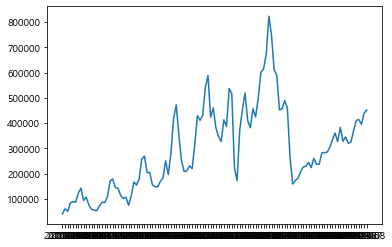

In [17]:
# 기준년월별 관광객 변화 추이 
plt.plot(df_fillter['기준년월'],df_fillter['관광'])
plt.show()

In [19]:
df_fillter['기준년월'] # 시리즈 

17      2010-01
77      2010-02
137     2010-03
197     2010-04
257     2010-05
         ...   
6677    2019-04
6737    2019-05
6797    2019-06
6857    2019-07
6917    2019-08
Name: 기준년월, Length: 116, dtype: object

In [20]:
df_fillter[['기준년월']] # 데이터 프레임 

,기준년월
17,2010-01
77,2010-02
137,2010-03
197,2010-04
257,2010-05
...,...
6677,2019-04
6737,2019-05
6797,2019-06
6857,2019-07


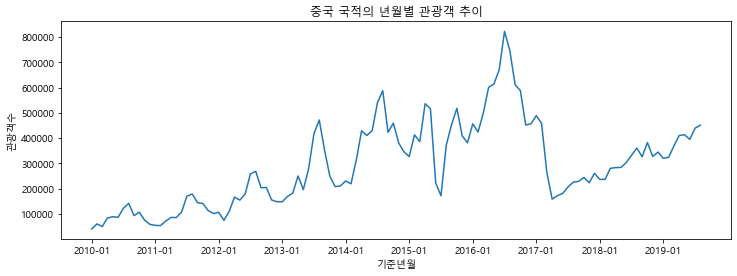

In [56]:
# 그래프 크기 조정
plt.figure(figsize=(12,4)) # (너비, 높이)
#데이터 넣기
plt.plot(df_fillter['기준년월'],df_fillter['관광'])
#그래프 전체 제목 넣기
plt.title('중국 국적의 년월별 관광객 추이')
#x축, y축 라벨 넣기
plt.xlabel('기준년월')
plt.ylabel('관광객수')
#x축의 눈금 값(범위) 설정
plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])
plt.show()

In [45]:
# 우리나라에 방문하는 외국인 관광객의 비율이높은 상위 5개 국가를 조회 ..
# 상위 top 5 국가 조회

df_top = pd.DataFrame(df.groupby('국적')['전체비율(%)'].mean())
df_top
df_top5 = df_top.sort_values(['전체비율(%)'],ascending=False)
df_top5.head(5)

,전체비율(%)
국적,
중국,32.116379
일본,28.350000
대만,6.650000
미국,6.039655
홍콩,4.645690


In [139]:
# 다른풀이 
# 피봇테이블 이용하여 상위 top5 조회
# 국적별 전체 비율에 대한 평균을 내림차순 하여 상위 5개 추출 
temp = pd.pivot_table(df, index = '국적', 
                      values = '전체비율(%)', 
                      aggfunc = 'mean').sort_values('전체비율(%)', ascending=False).head(5)

temp

,전체비율(%)
국적,
중국,32.116379
일본,28.350000
대만,6.650000
미국,6.039655
홍콩,4.645690


In [58]:
temp.reset_index(inplace=True)
# inplace =True  바로 반영 시켜라 
temp

,국적,전체비율(%)
0,중국,32.116379
1,일본,28.350000
2,대만,6.650000
3,미국,6.039655
4,홍콩,4.645690


In [59]:
cntry_list = temp['국적']
cntry_list

0    중국
1    일본
2    대만
3    미국
4    홍콩
Name: 국적, dtype: object

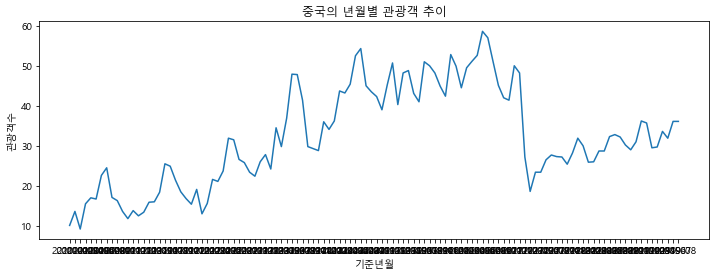

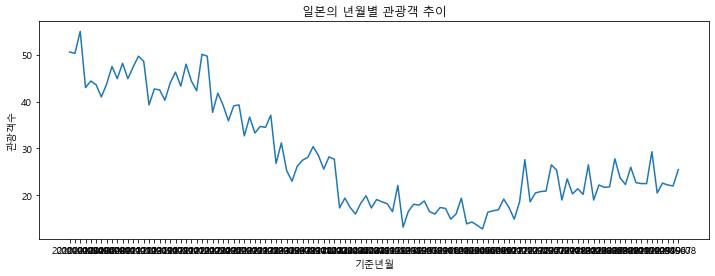

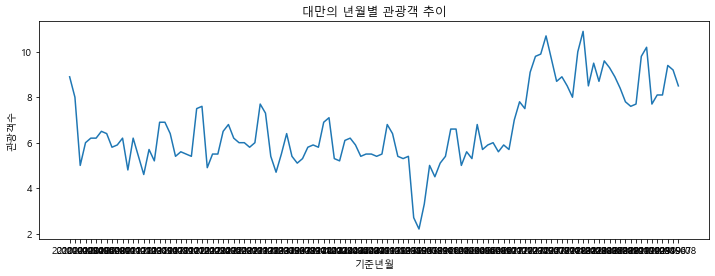

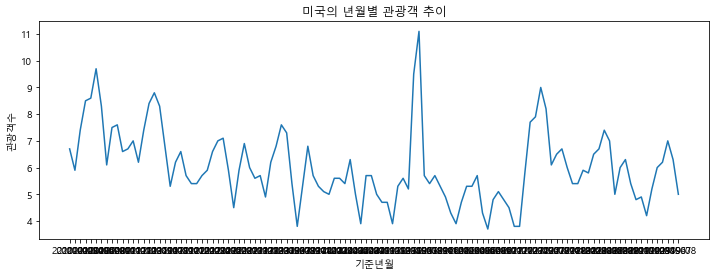

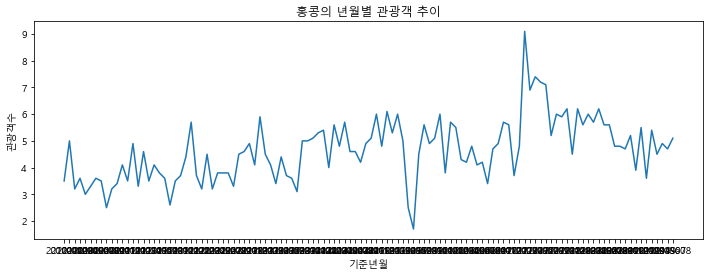

In [98]:
for i in cntry_list : # i를 값으로 반복시킬지 인덱스 값으로 반복시킬지 
    condition2 = df[df['국적']==i] # i 가 값을 기준으로 반복하기 때문에 i는 인덱스 아니고 값을 가진다
    # 그래프 크기 조정
    plt.figure(figsize=(12,4)) # (너비, 높이)
    #데이터 넣기
    plt.plot(condition2['기준년월'],condition2['전체비율(%)'])
    #그래프 전체 제목 넣기
    plt.title(('{}의 년월별 관광객 추이').format(i))
    #x축, y축 라벨 넣기
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    #x축의 눈금 값(범위) 설정
#     plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])
    plt.show()

### 풀이

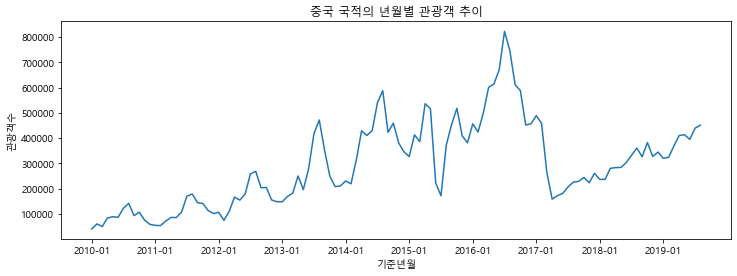

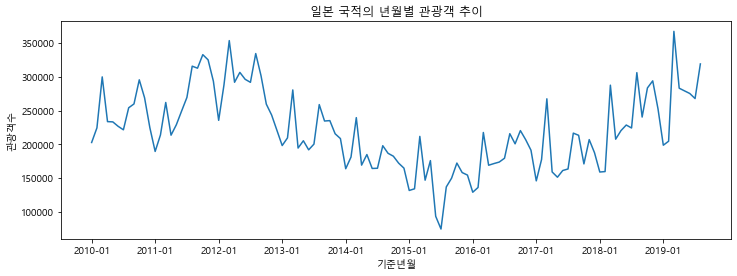

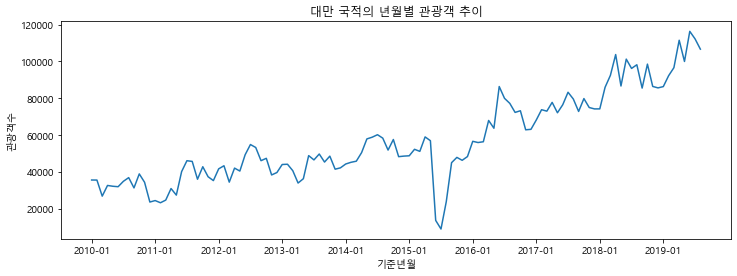

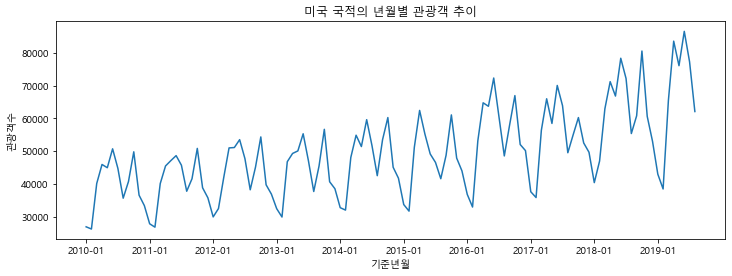

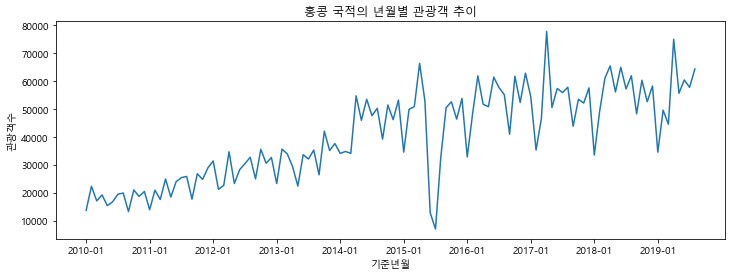

In [100]:
for cntry in cntry_list:
    condition = (df['국적']==cntry)
    df_fillter = df[condition]
    # 그래프 크기 조정
    plt.figure(figsize=(12,4)) # (너비, 높이)
    #데이터 넣기
    plt.plot(df_fillter['기준년월'],df_fillter['관광'])
    #그래프 전체 제목 넣기
    plt.title(('{} 국적의 년월별 관광객 추이').format(cntry))
    #x축, y축 라벨 넣기
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    #x축의 눈금 값(범위) 설정
    plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])
    plt.show()

In [101]:
# 히트맵 그리기
# 약한복사 df2 수정시 df도 변화
df2 = df
df2

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0


In [103]:
# 새로운 메모리공간에 주소를 부여받고 저장 df2 수정해도 df는 변화 x 
# 완전한 복제 
df2 = df.copy()
df2

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0


In [114]:
# df2의 기준년월 데이터에서 년도만 추출하여 '년도' 컬럼 만들기
# df2의 기준년월 데이터에서 월만 추출하여 '월' 컬럼 만들기
df2['년도'] = df2['기준년월'].str[:4]
df2['월'] = df2['기준년월'].str[-2:]
df2
# df2['년도'] = df2['기준년월'].str.slice(0,4)  슬라이스 방식 
# df2['월'] = df2['기준년월'].str.slice(5,7) 

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0,2019,08
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1,2019,08
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2,2019,08
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0,2019,08


In [115]:
df['년도'] = df['기준년월'].str[:4]
df['월'] = df['기준년월'].str[-2:]
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0,2019,08
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1,2019,08
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2,2019,08
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0,2019,08


In [117]:
condition = df['국적']=='중국'
condition

0       False
1       False
2       False
3       False
4       False
        ...  
6955    False
6956    False
6957    False
6958    False
6959    False
Name: 국적, Length: 6960, dtype: bool

In [118]:
df_fillter=df[condition]
df_fillter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,83.2,29.7,2019,04
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,82.7,33.6,2019,05
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,83.2,31.9,2019,06
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,84.7,36.1,2019,07


In [126]:
# 년도 및 월별 관광 데이터 조회 
df_pivot = pd.pivot_table(df_fillter, 
                      index = '년도', 
                      values = '관광',
                      columns ='월'
                      )
df_pivot



월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

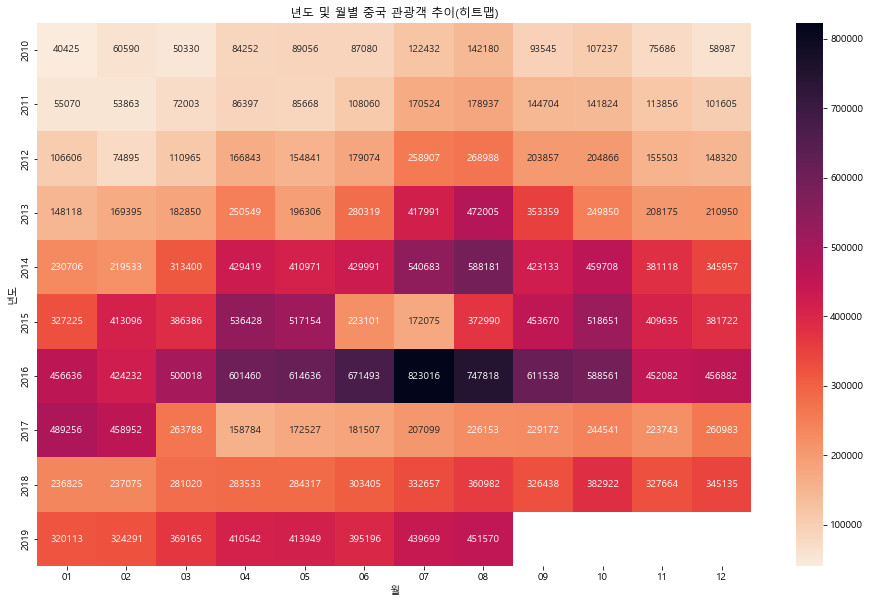

In [127]:
# 그래프 사이즈 설정하기
plt.figure(figsize=(16,10))

# 히트맵 그리기
sns.heatmap(df_pivot,annot=True, fmt = '.0f',cmap='rocket_r')
plt.title('년도 및 월별 중국 관광객 추이(히트맵)')
plt.show()
#annot=True 박스안 데이터 보여주기 =True
#fmt = '.0f' 소숫점까지 표현 일반적으로 사용 
#cmap='rocket_r' 히트맵 cmap으로 검색해서 찾아서 사용 

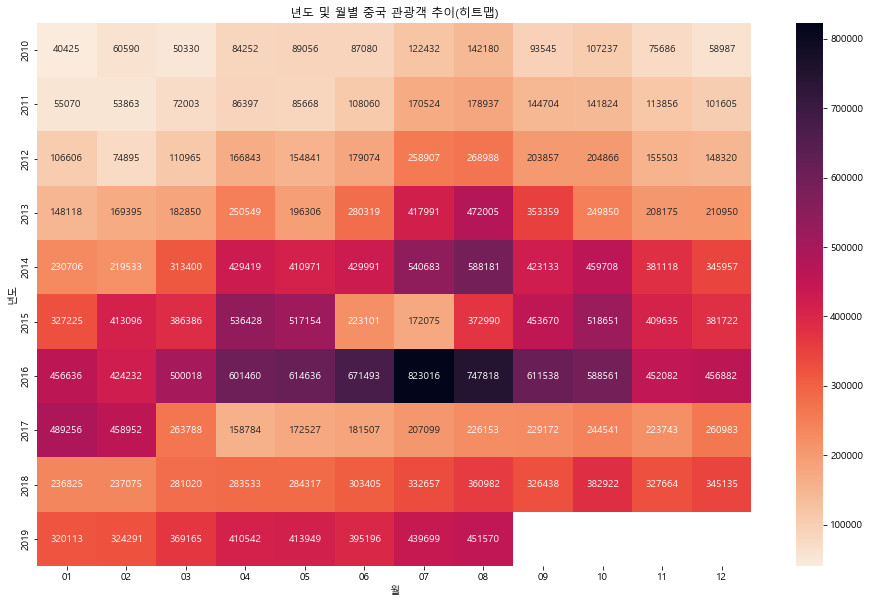

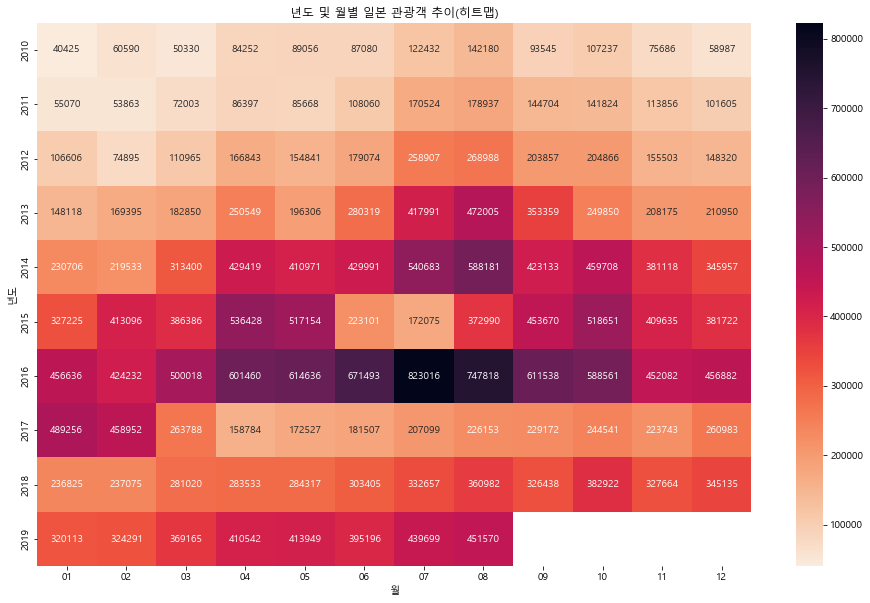

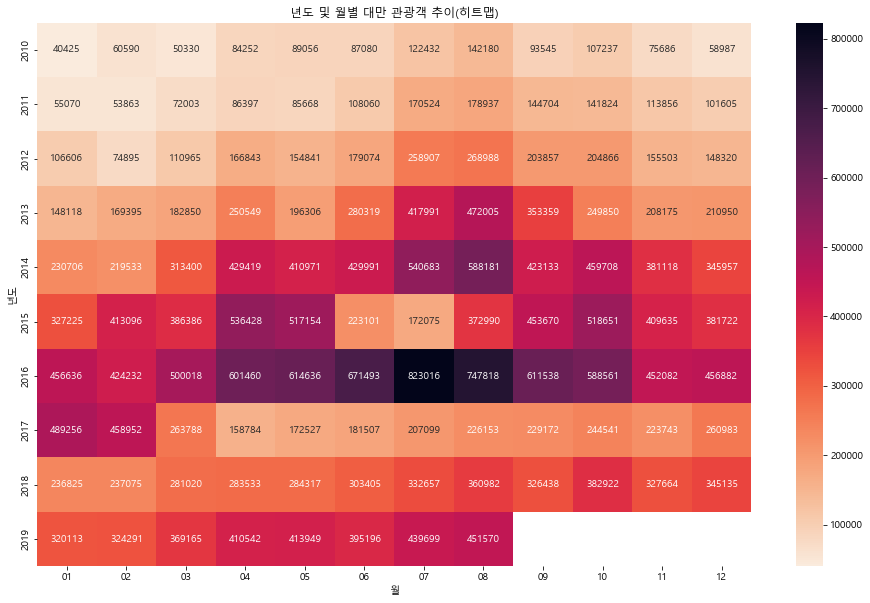

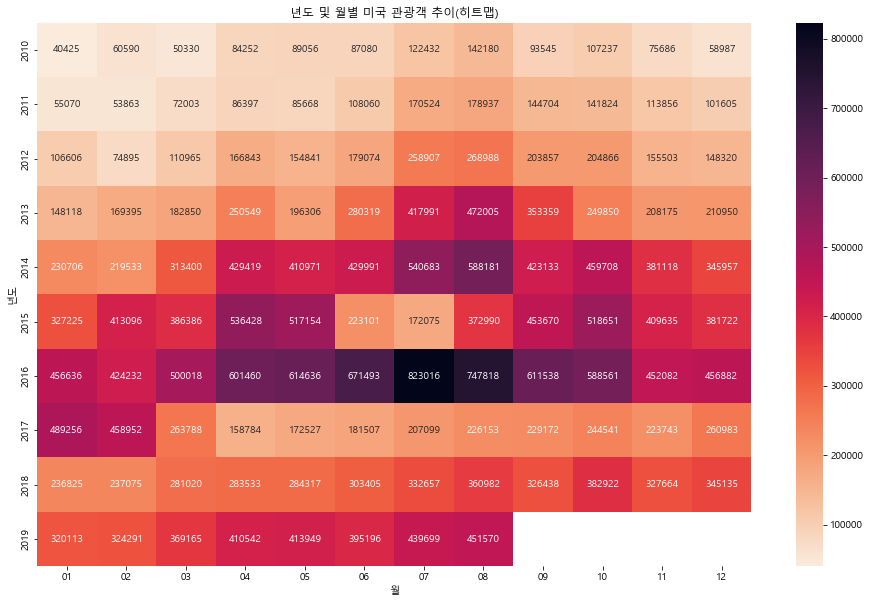

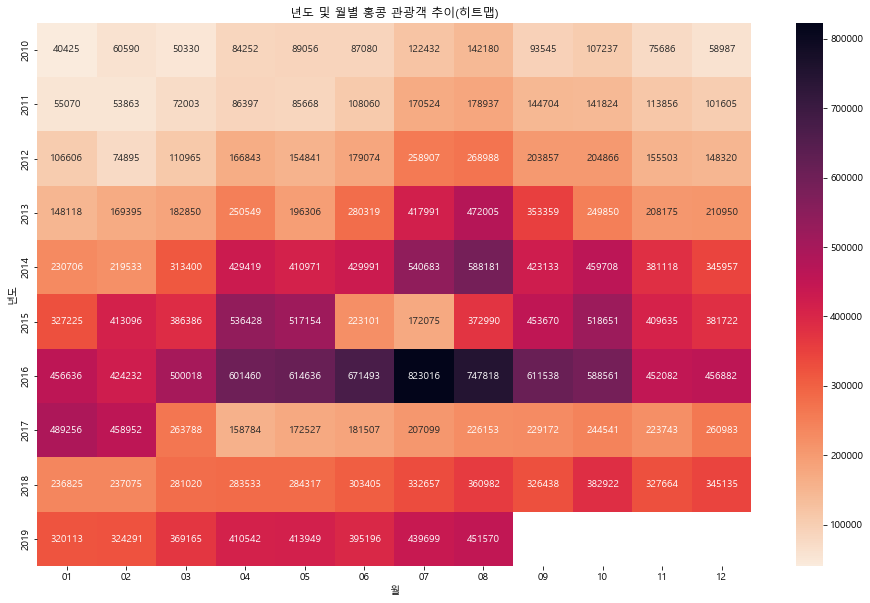

In [137]:
for cntry in cntry_list:
    condition = df['국적']=='중국'
    df_fillter=df[condition]
    df_pivot = pd.pivot_table(df_fillter, 
                          index = '년도', 
                          values = '관광',
                          columns ='월'
                          )
    df_pivot
    plt.figure(figsize=(16,10))

    # 히트맵 그리기
    sns.heatmap(df_pivot,annot=True, fmt = '.0f',cmap='rocket_r')
    plt.title('년도 및 월별 {} 관광객 추이(히트맵)'.format(cntry))
    plt.show()

### 풀이

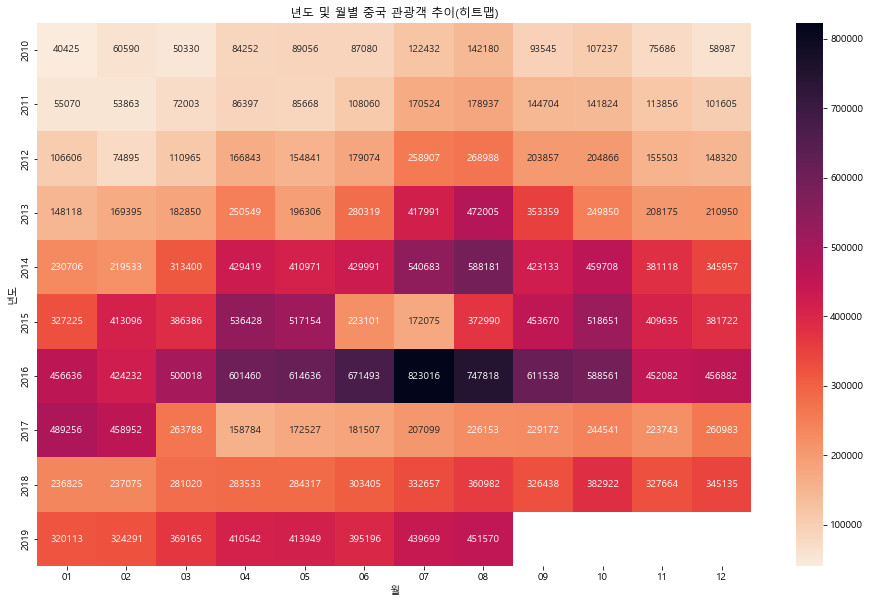

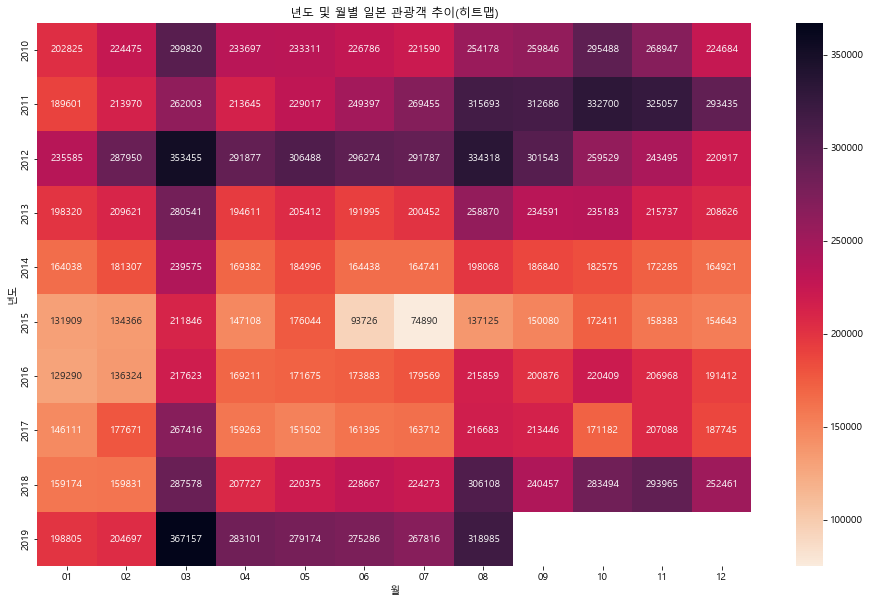

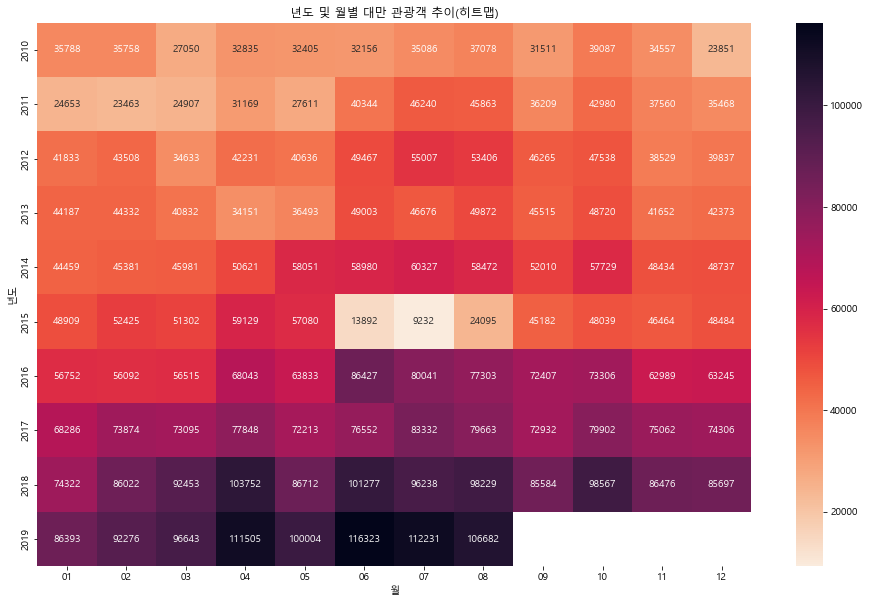

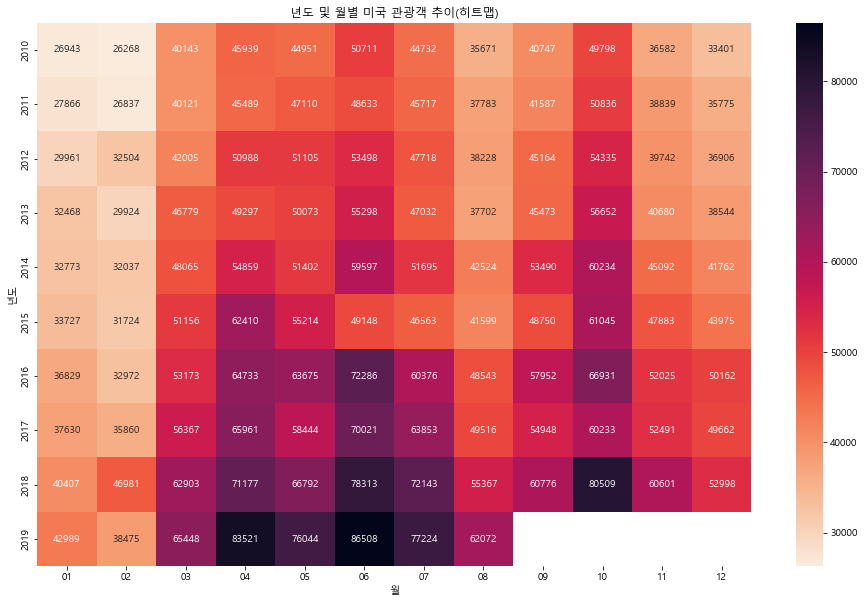

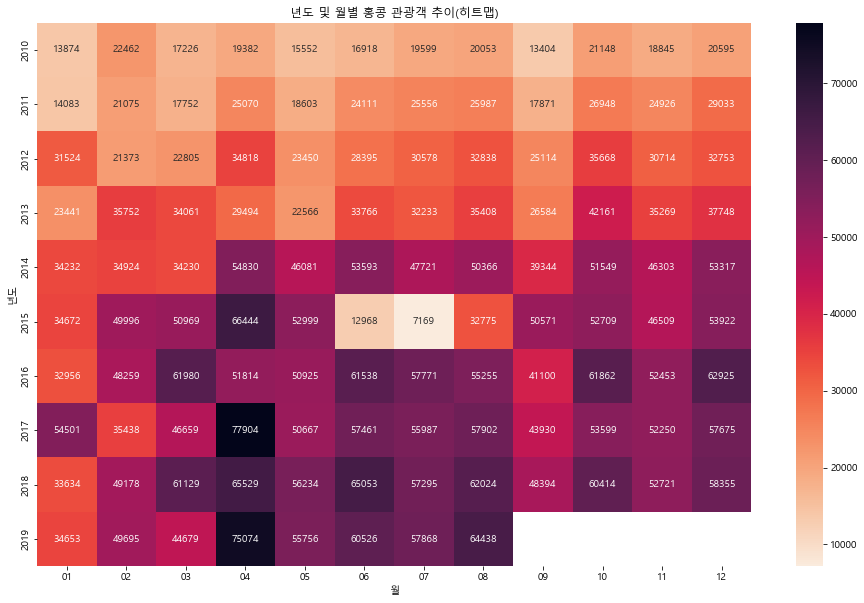

In [134]:
for cntry in cntry_list:
    condition = (df['국적']==cntry)
    df_fillter = df[condition]
    df_pivot = pd.pivot_table(df_fillter, 
                      index = '년도', 
                      values = '관광',
                      columns ='월'
                      )
    plt.figure(figsize=(16,10))
    sns.heatmap(df_pivot,annot=True, fmt = '.0f',cmap='rocket_r')
    plt.title('년도 및 월별 {} 관광객 추이(히트맵)'.format(cntry))
    plt.show()



- 트렌드 : 2010년부터 2018년까지 관광객 수가 꾸준히 증가하고 있으며,
             계절적인 영향을 많이 받는것으로 보임
- 이벤트 : 2015년 6월~8월 중에 관광객수가 급격히 감소했음
           - 원인분석 : 메르스 전염병에 의한 일시적 감소를 보였으며 이후 증가됨
           
           중국의 경우 2017년 3월부터 관광객수가 급격히 감소했음 
           - 원인분석 : 우리나라 정부의 사드 미사일 기지 설치에 따른 보복으로 급격히 감소하였으며,
                        매우 미미하게 관광객이 증가하고 있음 
- 계절 : 2010년부터 4월 ~ 8월 사이에 국내 관광객이 많으며, 
         2016년 이후 봄, 여름에 매우 많은 관광객과, 가을에 매우많은 관광객이 찾고있음
